# Instructions

* Make a copy of this colab.
* Add code where needed.
* Execute all cells, save colab with output.
* Submit your .ipynb file to canvas

In [95]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## Problem 1 - IsPalindrome - 15 points


Write a function to check if a given string is a palindrome and test it on the given input.

In [96]:
def IsPalindrome(s: str) -> bool:
  # translated prev java code for this (comments are notes for myself)

  # create version of given string without spaces, caps, & special characters
  simpler_str = ""
  for char in s:
    if char.isalnum(): # 'is alphanumeric', char.isLetterOrDigit()
      simpler_str += char.lower() # char.toLowerCase()

  # compare string head and tail
  left, right = 0, len(simpler_str)-1 # python lets you stack variable assignments
  while left < right:
    if simpler_str[left] != simpler_str[right]: # str[idx] is like str.charAt(idx)
      return False
    left += 1
    right -= 1

  return True

In [97]:
# DO NOT MODIFY THIS CELL, BUT DO EXECUTE THIS CELL

a = ['', 'a', 'aa', 'abba', 'abab', 'abca']
expected = [True, True, True, True, False, False]

for ix, s in enumerate(a):
  b = IsPalindrome(s)
  print(s, '->IsPalindrom->', b)
  assert b == expected[ix]

 ->IsPalindrom-> True
a ->IsPalindrom-> True
aa ->IsPalindrom-> True
abba ->IsPalindrom-> True
abab ->IsPalindrom-> False
abca ->IsPalindrom-> False


# Problem 2 - FlipSort - 20 points

Use the function `FlipPrefix()` given below that can flip a prefix an array to sort the array in increasing order. You can compare array elements but the only way to modify the array is to use `FlipPrefix()`. You may want to use NumPy's `argmax()` function.

In [98]:
# DO NOT MODIFY THIS CELL, BUT DO EXECUTE THIS CELL

def FlipPrefix(a: list[int], before_n: int) -> list[int]:
  assert 0 < before_n <= len(a)
  b = a[:before_n]
  return b[::-1] + a[before_n:]


In [99]:
def FlipSort(a: list[int]) -> list[int]:
  # FlipPrefix takes a given list and flips the contents up to a given idx(exclusive)
  # np.argmax() returns the idx of max val in list

  for i in range(len(a), 1, -1): # for (int i = a.length; i > 1 [until 1]; i--)
    max_idx = np.argmax(a[:i:]) # list[start(inclusive) , stop(exclusive), step(increment)]
    a = FlipPrefix(a, max_idx+1)
    # max elem is at front now
    a = FlipPrefix(a, i)
    # flip entire segment up till i so max is at the end
    # range gets shrunk. repeat.
  return a

In [100]:
# DO NOT MODIFY THIS CELL, BUT DO EXECUTE THIS CELL

a = [[3, 1, 2, 5, 4],
     [1],
     [100, 101, 51, 41, 31, 21, 11, 1]]

for row in a:
  b = FlipSort(row)
  print(row, '->FlipSort->', b)
  assert b == sorted(row)


[3, 1, 2, 5, 4] ->FlipSort-> [1, 2, 3, 4, 5]
[1] ->FlipSort-> [1]
[100, 101, 51, 41, 31, 21, 11, 1] ->FlipSort-> [1, 11, 21, 31, 41, 51, 100, 101]


# Problem 3 - Plot - 15 point

Plot following 4 functions in a 2x2 subplots using `plt.subplot()` function.

1.   y = x
1.   y = x^2
1.   y = x^3
1.   y = sigmoid(x)



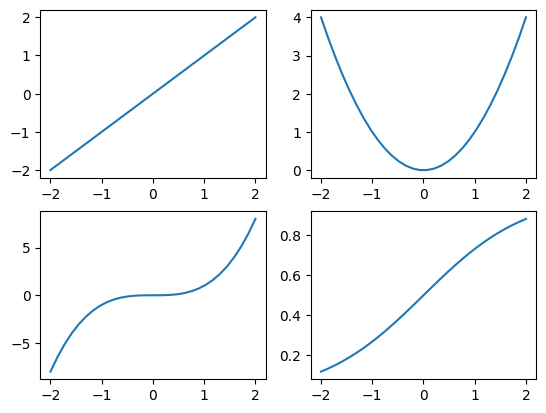

In [101]:
x = np.linspace(-2, 2, 30)
plt.subplot(2, 2, 1)
plt.plot(x, x)
# Update code here

# x^2
plt.subplot(2, 2, 2)
plt.plot(x, np.square(x))

# x^3
plt.subplot(2, 2, 3)
plt.plot(x, np.power(x, 3))

# sigmoid(x)
plt.subplot(2, 2, 4)
plt.plot(x, 1 / (1 + np.exp(-x))) # google def

plt.show()

# Problem 4 - Implement Multiple Linear Regression from scratch - 50 points

## Overview

In this problem, you will implement a **Multiple Linear Regression (MLR) model from scratch** (without bias) for a **Soundscape Emotion Recognition System**.

## Dataset:

The dataset consists of:

*   `arousal`: This is the ground truth (correct answer)
*   **Other columns**: The rest of the columns are features to use to train MLR model

You will use `test.csv` as the test set. **Do not modify this file**, as it will be used to compare the loss score across all students.

Additionally, you must **split** `train.csv` **into training and validation sets** in a **90:10 ratio**. No further data processing is required.

No further data processing is needed.

## Implementation details:

*   Train and test the MLR model using the provided datasets: `Train.csv` and `Test.csv` (available on Canvas). These files contain pre-extracted and processed features from audio clips.
*   Treat the `arousal` column as the **target variable** (in ML coding convension, this is called `y`), and all other columns as **input features** (in ML coding convension, this is called `X`)
*   **Do not perform any additional data processing** on the dataset.
*   Use **Stochastic Gradient Descent (SGD)** as the optimization algorithm.
*   You should experiment with different **learning rates** and **number of training epochs** to minimize loss.
*   While it is common to initialize the weight vector randomly, in this homework we require you to set it to the 0 vector.
*   Plot the loss curve for both training and validation in a single graph (you can use `mathplotlib` or `seaborn` libraries for this)
*   **Important:** you **CANNOT** use any machine learning libraries or packages like `sklearn` or `tensorflow` for this implementation. However, you may use `numpy` and/or `pandas` if needed.

## Submission Requirements:

*   Make a copy of this colab, add your code, run all the cells, and save output. Submit your completed code as .ipynb file with output. Don't submit a link to your colab.
*   Your submission must:
  *   Successfully train the model and display test results.
  *   Avoid runtime errors—points will be deducted for models that do not run correctly.
  *   Clearly present the train, validation, and test loss, along with a loss curve plot for both training and validation.
*   If your model fails to complete training, you will not receive full credit.







Average losses for Epoch 1:
Training loss = 0.3930, Validation loss = 0.3846

Average losses for Epoch 2:
Training loss = 0.3672, Validation loss = 0.3622

Average losses for Epoch 3:
Training loss = 0.3541, Validation loss = 0.3509

Average losses for Epoch 4:
Training loss = 0.3464, Validation loss = 0.3441

Average losses for Epoch 5:
Training loss = 0.3410, Validation loss = 0.3390

Average losses for Epoch 6:
Training loss = 0.3367, Validation loss = 0.3347

Average losses for Epoch 7:
Training loss = 0.3330, Validation loss = 0.3308

Average losses for Epoch 8:
Training loss = 0.3296, Validation loss = 0.3271

Average losses for Epoch 9:
Training loss = 0.3266, Validation loss = 0.3235

Average losses for Epoch 10:
Training loss = 0.3237, Validation loss = 0.3200

Average losses for Epoch 11:
Training loss = 0.3210, Validation loss = 0.3167

Average losses for Epoch 12:
Training loss = 0.3185, Validation loss = 0.3136

Average losses for Epoch 13:
Training loss = 0.3161, Validati

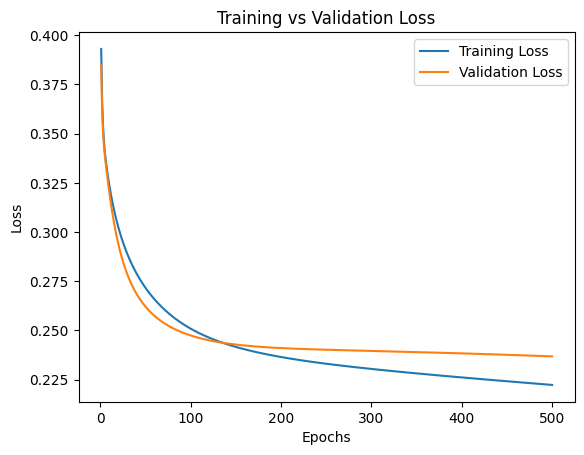

In [106]:
from sklearn.model_selection import train_test_split

# load, shuffle, split df
train_n_val_df = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/test.csv")

train_n_val_df = train_n_val_df.sample(frac=1).reset_index(drop=True)

train_df, val_df = train_test_split(train_n_val_df, test_size=0.1, random_state=1)

# convert to arrs for mathing
X_train = train_df.drop(columns=['arousal']).to_numpy()
y_train = train_df['arousal'].to_numpy()
X_val = val_df.drop(columns=['arousal']).to_numpy()
y_val = val_df['arousal'].to_numpy()
X_test = test_df.drop(columns=['arousal']).to_numpy()
y_test = test_df['arousal'].to_numpy()

# params
eta = 0.0000000001  # learning rate
num_of_epochs = 500
w = np.zeros(X_train.shape[1])  # initialize weights to zero vector (fixes matrix multp. errs)
test_loss_mean = 0

# store loss for graphs
training_loss_data = []
val_loss_data = []

for epoch in range(num_of_epochs):
  training_epoch_loss = []
  val_epoch_loss = []

  # TRAINING SET
  for i in range(X_train.shape[0]): #for every row in X_train, run step 2,3,4,5

    # step 2: compute prediction (for this row i)
    y_hat_train = np.dot(X_train[i],w)

    # step 3: calculate loss (for this row i)
    train_loss = ((y_train[i] - y_hat_train) ** 2)

    # step 4: compute gradient (for this row i)
    gradient = -2 * X_train[i] * (y_train[i] - y_hat_train)

    # step 5: update weight (for this row i)
    w = w - (eta * gradient)

    # store losses (for this row i)
    training_epoch_loss.append(train_loss)

  # VALIDATION SET
  for j in range(X_val.shape[0]):
    y_hat_val = np.dot(X_val[j],w) # step 2
    val_loss = np.mean((y_val[j] - y_hat_val) ** 2) # step 3
    val_epoch_loss.append(val_loss) # store losses for this row j

  # store mean losses for graph
  training_loss_data.append(np.mean(training_epoch_loss))
  val_loss_data.append(np.mean(val_epoch_loss))

  print(f"Average losses for Epoch {epoch+1}:")
  print(f"Training loss = {np.mean(training_epoch_loss):.4f}, Validation loss = {np.mean(val_epoch_loss):.4f}\n")

# TEST SET
y_hat_test = np.dot(X_test, w)
test_loss_avg = np.mean((y_test - y_hat_test) ** 2)
print("------------------------------------------------")
print(f"\nAvg Test Loss: {test_loss_avg}\n")
print("-----------------------------------------------\n")

# Plot training vs validation loss
plt.plot(range(1, len(training_loss_data) + 1), training_loss_data, label="Training Loss")
plt.plot(range(1, len(val_loss_data) + 1), val_loss_data, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()